In [1]:
#We need to install tf version 2.15 for compatibility with this notebook (written in March 2024).
!pip uninstall tensorflow
!pip install tensorflow==2.15.0
!tensorflow --version

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
  Att

# Introduction to convolutional neural networks and computer vision with tensorflow

Computer vision is the practice of writing computer algorithms that can discover patterns in visual data.  Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 data set (101 different classes of food) https://www.kaggle.com/datasets/lethereal/food101

However we have modified it only use two classes (pizza and steak) using the image data modificaiton notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 We start with a smaller dataset so we can experiment quickly and figure out what works or better yet what doesn't work before scaling up.

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-11-08 04:19:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2024-11-08 04:19:17 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.  
And for a computer vision project, this usually means visually many samples of your data.



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os
# Walk through pizza_steak directory and list number of the files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Nov  8 04:19 .
drwxr-xr-x 1 root root 4096 Nov  8 04:19 ..
drwxr-xr-x 4 root root 4096 Nov  8 04:19 test
drwxr-xr-x 4 root root 4096 Nov  8 04:19 train


In [8]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [9]:
# To get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of classnames from subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f'Image shape: {img.shape}') #show the shape of the image

  return img

['1421393.jpg']
Image shape: (384, 512, 3)


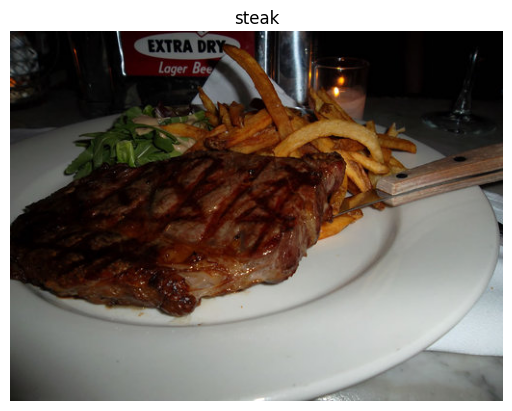

In [11]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[25, 28, 33],
        [17, 20, 25],
        [15, 16, 20],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[17, 18, 22],
        [20, 21, 25],
        [23, 23, 25],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[25, 25, 25],
        [24, 22, 23],
        [22, 18, 19],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[25, 26, 21],
        [26, 27, 22],
        [26, 27, 22],
        ...,
        [78, 83, 79],
        [83, 88, 84],
        [87, 92, 88]],

       [[24, 25, 20],
        [24, 25, 20],
        [25, 26, 21],
        ...,
        [73, 78, 74],
        [79, 84, 80],
        [84, 89, 85]],

       [[23, 24, 19],
        [23, 24, 19],
        [24, 25, 20],
        ...,
        [70, 75, 71],
        [76, 81, 77],
        [81, 86, 82]]], dtype=uint8)>

In [13]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.09803922, 0.10980392, 0.12941176],
        [0.06666667, 0.07843137, 0.09803922],
        [0.05882353, 0.0627451 , 0.07843137],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.06666667, 0.07058824, 0.08627451],
        [0.07843137, 0.08235294, 0.09803922],
        [0.09019608, 0.09019608, 0.09803922],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.09411765, 0.08627451, 0.09019608],
        [0.08627451, 0.07058824, 0.0745098 ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.09803922, 0.10196078, 0.08235294],
        [0.10196078, 0.10588235, 0.08627451],
        [0.10196078, 0

## an end to end example

Let's build a CNN to find patterns in our images.  More specifically we need a way to:
* load our images,
* preprocess our images,
* build a CNN to find patterns in our images
* compile our CNN
* fit the cnn to our training data




In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data.  get all the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#build a CNN model.  this is the same as Tiny VGG on the CNN explainer website
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
                           ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid",
                              ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 182ms/step - loss: 0.6458 - accuracy: 0.6600 - val_loss: 0.4359 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4749 - accuracy: 0.7913 - val_loss: 0.3714 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4324 - accuracy: 0.8127 - val_loss: 0.3711 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3965 - accuracy: 0.8260 - val_loss: 0.3446 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3659 - accuracy: 0.8440 - val_loss: 0.3054 - val_accuracy: 0.8680


In [15]:
len(train_data)

47

🔑 ** Note if the above cell is taking longer than ~10 seconds per epoch, make sure you are using GPU acceleration

In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

https://poloclub.github.io/cnn-explainer/

Using the same model as before

In [17]:
#Let's replicate the model we created in a previous section to see if it works with our image classificaiton data.
#The model we are replicating is the one from the tensorflow playground
# https://playground.tensorflow.org/

#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

#fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 1.0334 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6888 - accuracy: 0.6093 - val_loss: 0.6864 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6856 - accuracy: 0.7220 - val_loss: 0.6873 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6859 - accuracy: 0.6620 - val_loss: 0.6906 - val_accuracy: 0.5500


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#Let's replicate the model we created in a previous section to see if it works with our image classificaiton data.
#The model we are replicating is the one from the tensorflow playground
# https://playground.tensorflow.org/

#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 148ms/step - loss: 0.6194 - accuracy: 0.6247 - val_loss: 0.5795 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5163 - accuracy: 0.7520 - val_loss: 0.4141 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4440 - accuracy: 0.8073 - val_loss: 0.4528 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4027 - accuracy: 0.8260 - val_loss: 0.3835 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3399 - accuracy: 0.8633 - val_loss: 0.4258 - val_accuracy: 0.8180


Despite having 20x more parameters than model_1, model_2 performs worse

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 dense_4 (Dense)             (None, 110, 110, 4)       44        
                                                                 
 dense_5 (Dense)             (None, 110, 110, 4)       20        
                                                                 
 flatten_2 (Flatten)         (None, 48400)             0         
                                                      

🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

## Binary classification - lets break it down.
1. Become one with the data (Visualize, visualize, visualize)
2. Prepare hte data (prepared it for our model, the main step here was scaling / normalizing) and turning out data into batches
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)



### 1. Become one with the data

['1117936.jpg']
Image shape: (512, 512, 3)
['665900.jpg']
Image shape: (384, 512, 3)


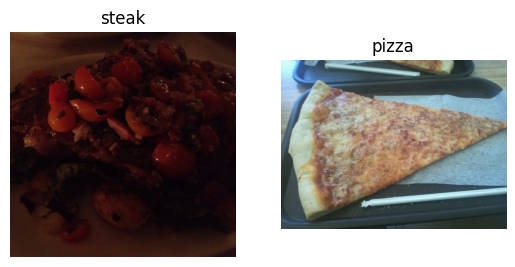

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data.  Prepare it for a model


In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into **batches**

A batch is a small subset of data.  Rather than look at all ~10k images at one time, a model might only look at 32 at a time.  It does this for a couple of reasons:
1. A million images (10k or more) might not fit into the memory of your GPU.  
2. Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health.... (Yann Lecunn)


In [23]:
# Create train and test data generators and rescale the data
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [24]:
# Load in our image data into directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,   #target dir of images
                                               target_size=(224,224), #target size of images
                                               class_mode="binary",   #type of data you're working with
                                               batch_size=32)         #size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of training data batch
images, labels = train_data.next()  #get the next batch of images, labels in train data
len(images), len(labels)


(32, 32)

In [26]:
# how many batches are there
len(train_data)

47

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (begin with a baseline)

A baseline is a relatively simple model or existing result that you set up when beginning a machine learning experiment and then as you keep experimenting you try to beat the baseline.

🔑 ** Note ** In deep learning, there is almost an infinite number of architectures to use.  So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required.  eg. look up which current model is performing best in the field for your problem.

In [30]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,      #filters is the number of sliding windows going across an input.  higher = the more complex model
            kernel_size=3,  #size of the sliding window going across an input
            strides=1,      #size of the step a sliding window takes across an input
            padding="valid",  #if "same", output shape is same as input shape.  if "valid", output shape gets compressed
            activation="relu",
            input_shape=(224,224,3)), #input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  #output layers (working with binary classification so only 1 output neuron)

     ])


⚒ ** Practice ** Understand what is going on in the Conv2D layer by going through the CNN explainer website for 10-20 mins.

In [31]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")



In [32]:
#Get a summary of our model to see how the input shape changes throughout
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model


In [33]:
# Check the lengths of training and text data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data, #this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 156ms/step - loss: 2.1058 - accuracy: 0.6040 - val_loss: 0.5891 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5362 - accuracy: 0.7513 - val_loss: 0.4557 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4362 - accuracy: 0.8100 - val_loss: 0.3840 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3411 - accuracy: 0.8653 - val_loss: 0.4005 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.2416 - accuracy: 0.9067 - val_loss: 0.4258 - val_accuracy: 0.8140


In [35]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3054 - accuracy: 0.8680


[0.30535659193992615, 0.8679999709129333]

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.  

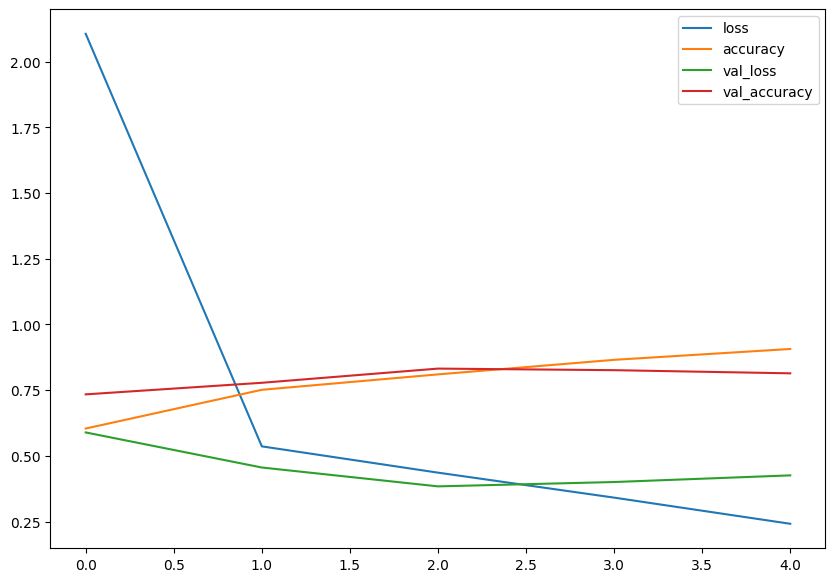

In [37]:
#Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


** 🔑 Note: ** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.  This means it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.  

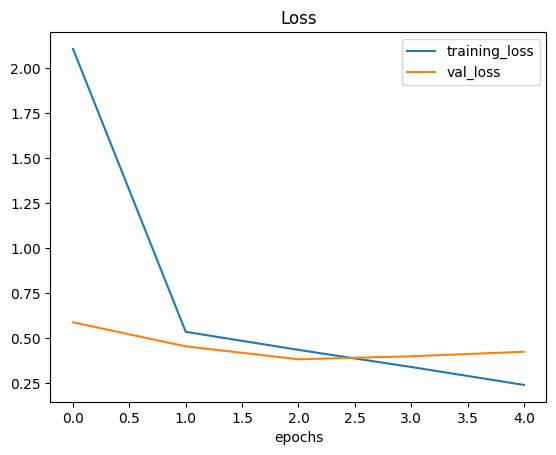

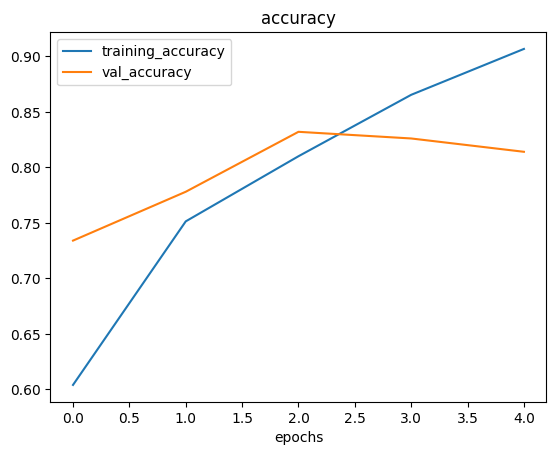

In [39]:
#Check out the loss and accuracy of model_4

plot_loss_curves(history_4)

### 6. Adjust the model parameters ###


Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Way to induce overfitting:
* Increase number of conv layers
* Increase number of conv filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers such as MaxPool2D
* Add more data

> ** 🔑 Note: ** Reducing overfitting is also known as **regularization**



In [40]:
#CReate the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [41]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy"
)

#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 0.6444 - accuracy: 0.6547 - val_loss: 0.4749 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4502 - accuracy: 0.7940 - val_loss: 0.3843 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4136 - accuracy: 0.8207 - val_loss: 0.3436 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3881 - accuracy: 0.8327 - val_loss: 0.3716 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3725 - accuracy: 0.8353 - val_loss: 0.3320 - val_accuracy: 0.8680


In [42]:
# Get a summary of our model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

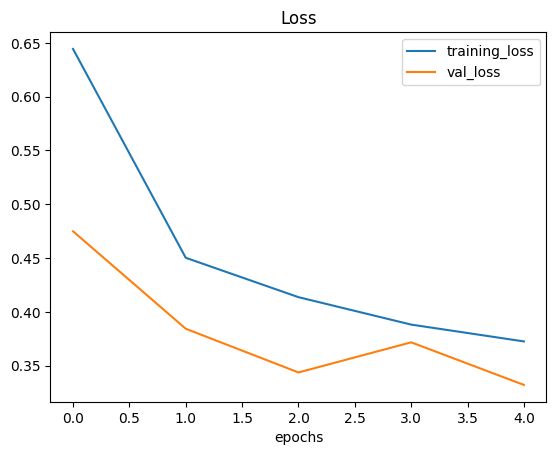

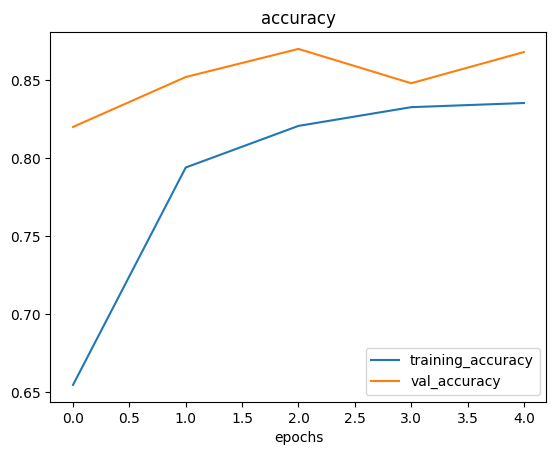

In [43]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation


In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


** Question: ** What is data augmentation?

Data Augmentation is the process of altering our training data, leaving it to have more diversity and in turn allowing our models to learn more generalizable patterns and altering might mean adjusting the rotation of an image, flipping, cropping it, something similar.

Let's write some code to visualize data augmentation.

In [45]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)  # for demonstration purposes only

#Create non-augmented train_data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
#Create non-augmented test data batches
print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary" )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Training augmentation is usually only used on training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!

In [46]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels aren't augmented.  Just data

showing image number: 25


(-0.5, 223.5, 223.5, -0.5)

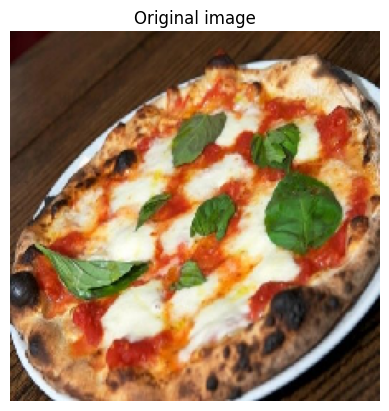

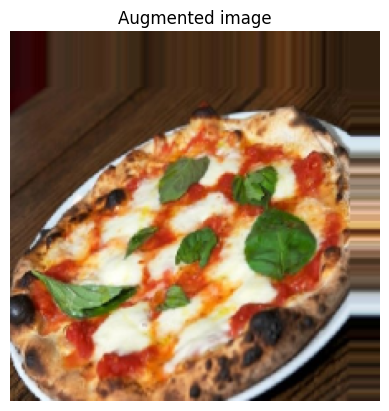

In [47]:
#Show original image and augmented image
import random
random_number = random.randint(0,32) #our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)


In [48]:
#Create the model (this is going to be our new baseline) (with augmented data)
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy"
)

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 428ms/step - loss: 0.7976 - accuracy: 0.4987 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6918 - accuracy: 0.5280 - val_loss: 0.6820 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 19s 410ms/step - loss: 0.6990 - accuracy: 0.4973 - val_loss: 0.6669 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6935 - accuracy: 0.4880 - val_loss: 0.6737 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 20s 426ms/step - loss: 0.6619 - accuracy: 0.5513 - val_loss: 0.5965 - val_accuracy: 0.6840


In [50]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, None, None, 10)   

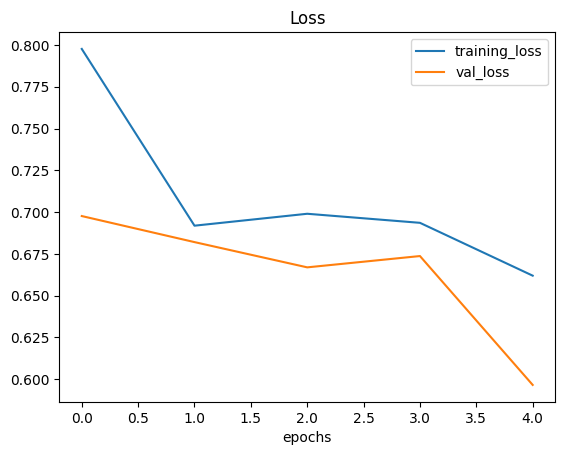

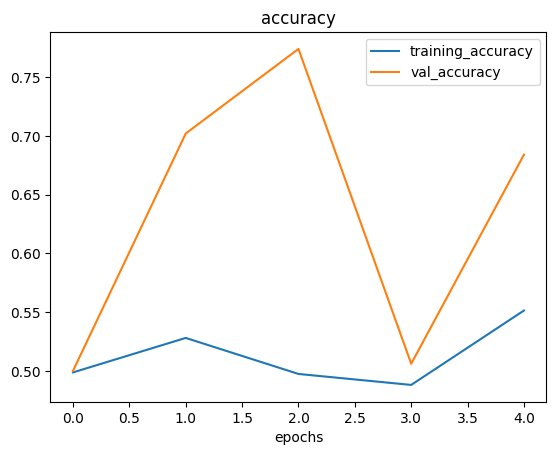

In [51]:
plot_loss_curves(history_6)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [52]:
#Import data and augment it *and shuffle it* from training directory
print("Augmented and shuffled training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)


Augmented and shuffled training data
Found 1500 images belonging to 2 classes.


In [ ]:
#Create the model
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
42/47 [=========================>....] - ETA: 1s - loss: 0.6881 - accuracy: 0.5500

Let's shuffle our training data and our augmented training data and train another model the same as before on it and see what happens ^

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

> ** 🔑 Note ** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied.  

Since we've already beaten our baseline, there are a few things we can try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layers (e.g. go from 10 to 32 or 64)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it to our own use case.  

> ** ⚒ Practice** Recreate the model on the CNN explainer website (same as `model 1`) and see how it performs on the augmented shuffled training data.

In [ ]:
#build a CNN model.  this is the same as Tiny VGG on the CNN explainer website
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
                           ),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid",
                              ),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our CNN
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

#Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
plot_loss_curves(history_8)

## Making a prediction on our trained model with our own custom data

In [ ]:
# Classes we're working with
print(class_names)

In [ ]:
# View our example image
#import matplotlib
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1f39d5dc907d2a2f32b6fbafd5de71a81c8f4a06/images/03-steak.jpeg
#!wget https://thelionsroarmhsn.com/wp-content/uploads/2015/04/Pepperoni_1.jpg
#steak = mpimg.imread("03-steak.jpeg")
#!wget https://images.alphacoders.com/991/thumb-1920-991307.jpg
#steak = mpimg.imread("thumb-1920-991307.jpg")
!wget https://i.pinimg.com/originals/fe/d5/16/fed5163f4940ecdbe6f70ec8c4af37ff.jpg
steak = mpimg.imread("fed5163f4940ecdbe6f70ec8c4af37ff.jpg")
#steak = mpimg.imread("Pepperoni_1.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# CHeck the shape of our image
steak.shape

> ** 🔑 Note: ** When you train a NN, and you want to make a prediction with it on your own custom data, it's important that your custom data is preprocessed in the same format as the data your model was trained on

In [ ]:
# Create a function to import our image and resize it to be able to be used with our model.
def load_and_prep_image(filename, img_shape=224):
  '''
  reads an image from filename, turns it into a tensor and reshapes
  it to (img_shape, img_shape, color_channels).
  '''
  #read in the image
  img=tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [ ]:
#Load in and preprocess our custom image
steak = load_and_prep_image("fed5163f4940ecdbe6f70ec8c4af37ff.jpg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction.

In [ ]:
#REmind ourselves of our class names
class_names

In [ ]:
#We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  '''
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



In [ ]:
#Test our model on a custom image
pred_and_plot(model_8, "fed5163f4940ecdbe6f70ec8c4af37ff.jpg")

In [ ]:
#Test pepperoni
pred_and_plot(model_7, "fed5163f4940ecdbe6f70ec8c4af37ff.jpg")

# Multiclass image classification#

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multiclass classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create the model (start with the baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline / reduce overfitting).
7. Repeat until satisfied


## Import and become one with the data


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

#Walk through 10 classes of all image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [ ]:
#Setup the train and test directories
train_dir_multi = "10_food_classes_all_data/train/"
test_dir_multi = "10_food_classes_all_data/test/"

In [ ]:
#let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir_multi)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

In [ ]:
# Visualize x 3
import random
img = view_random_image(target_dir=train_dir_multi,
                        target_class=random.choice(class_names))

### 2. Preprocess the data ###

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all ~10k images at one time, a model might only look at 32 at a time. It does this for a couple of reasons:

A million images (10k or more) might not fit into the memory of your GPU.
Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well.
Why 32?

Because 32 is good for your health.... (Yann Lecunn)

In [ ]:
train_datagen_multi = ImageDataGenerator(rescale=1/255.)
test_datagen_multi = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Load in our data and turn them into batches

In [ ]:
train_data_multi = train_datagen_multi.flow_from_directory(directory=train_dir_multi,
                                                           target_size=(224,224),
                                                           class_mode="categorical",
                                                           batch_size=32)
test_data_multi = test_datagen_multi.flow_from_directory(directory=test_dir_multi,
                                                         target_size=(224,224),
                                                         class_mode="categorical",
                                                         batch_size=32)

In [ ]:
# Get a sample of training data batch
images, labels = train_data_multi.next()  #get the next batch of images, labels in train data
len(images), len(labels)

In [ ]:
#how many batches are there?
len(train_data_multi)

In [ ]:
#Get the first two images
images[:2], images[0].shape

In [ ]:
#View the first batch of labels
labels

### 3. Create a model (start with the baseline) ###

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem?

In [ ]:
#1. Create the model
model_9 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax"),
])

#2. Compile the model
model_9.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics="accuracy")

### 4 ###
#3. Fit the model
history_9 = model_9.fit(train_data_multi,
            epochs=5,
            steps_per_epoch=len(train_data_multi),
            validation_data=test_data_multi,
            validation_steps=len(test_data_multi))

In [ ]:
plot_loss_curves(history_9)

In [ ]:
#pred_and_plot(model_9, "fed5163f4940ecdbe6f70ec8c4af37ff.jpg")

### 5. Evaluate the model ###



In [ ]:
#Evaluate on the test data
model_9.evaluate(test_data_multi)

In [ ]:
#Check out the model's loss curves
plot_loss_curves(history_9)

What do these loss curves tell us?

Well it seems our model is **overfitting** the training set quite badly... in other words it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust model hyperparameters (to beat the baseline / reduce overfitting.)

Due to its performance on the training data, it's clear our model is learning something.

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **get more data** having more data gives the model more opportunity to learn diverse patterns
* **simplify the model** if our current model is overfitting the data, it may be too complicated a model.  One way to simplify the model is to reduce the number of layers or reduce number of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it without altering the original data
* **use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# how about we try to simplify our model first.
#Let's try to remove 2 convolutional layers
model_9.summary()


In [ ]:
model_10 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss=tf.keras.losses.categorical_crossentropy,
                 optimizer=Adam(),
                 metrics="accuracy")



In [ ]:
model_10.summary()

In [ ]:
#Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data_multi,
                          epochs=5,
                          steps_per_epoch=len(train_data_multi),
                          validation_data=test_data_multi,
                          validation_steps=len(test_data_multi))



In [ ]:
plot_loss_curves(history_10)

Looks like our simplifying the model experiment didnt work.  Our accuracy went down and overfitting continued.

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation ###

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy



In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_multi_augmented = ImageDataGenerator(rescale=1/255.,
                                                   rotation_range=0.2,
                                                   #shear_range=0.2,
                                                   zoom_range=0.2,
                                                   width_shift_range=0.2,
                                                   height_shift_range=0.2,
                                                   horizontal_flip=True)



In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_multi_augmented = train_datagen_multi_augmented.flow_from_directory(train_dir_multi,
                                                                               target_size=(224,224),
                                                                               batch_size=32,
                                                                               class_mode="categorical",
                                                                               shuffle=False)

#Create non-augmented training data batches
print("Non-augmented training data")
train_data_multi = train_datagen_multi.flow_from_directory(train_dir_multi,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode="categorical",
                                                           shuffle=False)
#Create non-augmented test data


In [ ]:
#Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

#Compile the cloned model (using the same setup as previous models)
model_11.compile(loss=tf.keras.losses.categorical_crossentropy,
                 optimizer=Adam(),
                 metrics="accuracy")



In [ ]:
train_data_multi

In [ ]:
#1. Create the model
model_12 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax"),
])

#2. Compile the model
model_12.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics="accuracy")

### 4 ###
#3. Fit the model
history_12 = model_12.fit(train_data_multi_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_multi_augmented),
            validation_data=test_data_multi,
            validation_steps=len(test_data_multi))

In [ ]:
model_10.evaluate(test_data_multi)

In [ ]:
model_12.evaluate(test_data_multi)

In [ ]:
#Check out our model trained on augmented data loss curves

In [ ]:
plot_loss_curves(history_12)

Woah!  That looks much better.  the loss curves much closer to each other than each other than teh baseline model.  And they look like they are heading in the right direction.  We could try running for more epochs.

### 7. Repeat until satisfied ###

We could keep going here, trying continually to bring our loss curves closer together and trying to improve the validation/loss accuracy.  
How?  By running lots of experiments. Namely we could try
* restructuring our model's architecture by increasing layers/hidden units
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our imageDataGenerator instance)
* training for longer (eg. 10 epochs instead of 5 epochs).
* try **transfer learning**

### Making a prediction with our trainer model

Let's use our model to make some predictions based on custom images.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1f39d5dc907d2a2f32b6fbafd5de71a81c8f4a06/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1f39d5dc907d2a2f32b6fbafd5de71a81c8f4a06/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1f39d5dc907d2a2f32b6fbafd5de71a81c8f4a06/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1f39d5dc907d2a2f32b6fbafd5de71a81c8f4a06/images/03-steak.jpeg

In [ ]:
class_names

In [ ]:
#reconfig pre_and_plot function to work with multiclass images
def pred_and_plot(model, filename, class_names=class_names):
  '''
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  '''
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #add in logic for multi-class & get pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


In [ ]:
pred_and_plot(model=model_12,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)


Looks like our model didnt work very well on our custom images.  This is because it only achieved 10% accuracy on our training data so we can assume it would assume poorly on our test data.

### Saving and loading our model ###


In [ ]:
#Save a model
model_12.save("saved_trained_model_12")


In [ ]:
# Load in a trained model and evaluate it
loaded_model_12 = tf.keras.models.load_model("saved_trained_model_12")
loaded_model_12.evaluate(test_data_multi)

In [ ]:
# Compare our loaded model to our existing model
model_12.evaluate(test_data_multi)